# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX          256   
2       SubscriptionId_222  CustomerId_4683          UGX          256   
3      SubscriptionId_2185   CustomerId_988          UGX          256   
4      SubscriptionId_3829   CustomerId_988          UGX          256   
...                    ...              ...          ...          ...   
95657  SubscriptionId_3829  CustomerId_3078          UGX          256   
95658  SubscriptionId_2643  CustomerId_3874          UGX          256   
95659  SubscriptionId_3829  CustomerId_3874          UGX          256   
95660   SubscriptionId_652  CustomerId_1709          UGX          256   
95661  SubscriptionId_3829  CustomerId_1709          UGX          256   

         ProviderId     ProductId     ProductCategory    ChannelId   Amount  \
0      ProviderId_6  ProductId_10             airtime  ChannelId_3   1000.0   
1      ProviderId_4   ProductId_6  financial_services  ChannelId_2    -20.0   
2      ProviderId_6   ProductId_1             airtime  ChannelId_3    500.0   
3      ProviderId_1  ProductId_21        utility_bill  ChannelId_3  20000.0   
4      ProviderId_4   ProductId_6  financial_services  ChannelId_2   -644.0   
...             ...           ...                 ...          ...      ...   
95657  ProviderId_4   ProductId_6  financial_services  ChannelId_2  -1000.0   
95658  ProviderId_6  ProductId_10             airtime  ChannelId_3   1000.0   
95659  ProviderId_4   ProductId_6  financial_services  ChannelId_2    -20.0   
95660  ProviderId_6  ProductId_19                  tv  ChannelId_3   3000.0   
95661  ProviderId_4   ProductId_6  financial_services  ChannelId_2    -60.0   

       Value      TransactionStartTime  PricingStrategy  FraudResult  
0       1000 2018-11-15 02:18:49+00:00                2            0  
1         20 2018-11-15 02:19:08+00:00                2            0  
2        500 2018-11-15 02:44:21+00:00                2            0  
3      21800 2018-11-15 03:32:55+00:00                2            0  
4        644 2018-11-15 03:34:21+00:00                2            0  
...      ...                       ...              ...          ...  
95657   1000 2019-02-13 09:54:09+00:00                2            0  
95658   1000 2019-02-13 09:54:25+00:00                2            0  
95659     20 2019-02-13 09:54:35+00:00                2            0  
95660   3000 2019-02-13 10:01:10+00:00                2            0  
95661     60 2019-02-13 10:01:28+00:00                2            0  

[95393 rows x 16 columns]

## Encode Categorical Variables

In [3]:
encoded_df = encode_categorical_variables(cleaned_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95393 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95393 non-null  int32              
 1   BatchId               95393 non-null  int32              
 2   AccountId             95393 non-null  int32              
 3   SubscriptionId        95393 non-null  int32              
 4   CustomerId            95393 non-null  int32              
 5   CurrencyCode          95393 non-null  int32              
 6   CountryCode           95393 non-null  int64              
 7   ProviderId            95393 non-null  int32              
 8   ProductId             95393 non-null  int32              
 9   ProductCategory       95393 non-null  int32              
 10  ChannelId             95393 non-null  int32              
 11  Amount                95393 non-null  float64            
 12  Value    

In [4]:
encoded_df.head()

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0          77920    46849       2476            3517        2569   
1          75597    31670       3203            2354        2569   
2          39772    60107       2699             994        2791   
3          48595     1792       3335             972        3714   
4          41241    48807       3203            2354        3714   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0             0          256           5          1                0   
1             0          256           3         19                2   
2             0          256           5          0                0   
3             0          256           0         11                8   
4             0          256           3         19                2   

   ChannelId   Amount  Value      TransactionStartTime  PricingStrategy  \
0          2   1000.0   1000 2018-11-15 02:18:49+00:00                2   
1          1    -20.0     20 2018-11-15 02:19:08+00:00                2   
2          2    500.0    500 2018-11-15 02:44:21+00:00                2   
3          2  20000.0  21800 2018-11-15 03:32:55+00:00                2   
4          1   -644.0    644 2018-11-15 03:34:21+00:00                2   

   FraudResult  
0            0  
1            0  
2            0  
3            0  
4            0

## Feature Aggregation (RFMS) 

### RFMS Features:

##### Recency(R): Time since a customer's last purchase or transaction.

##### Frequency(F): Number of purchases or transactions a customer has made.

##### Monetary(M): Total amount of money a customer has spent with the business.

##### Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [5]:
aggregated_df = create_aggregate_features(encoded_df)
aggregated_df

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0              77920    46849       2476            3517        2569   
2              39772    60107       2699             994        2791   
3              48595     1792       3335             972        3714   
6              13624    13746       1177             801        1315   
8              59112    89971       1423            3106        3337   
...              ...      ...        ...             ...         ...   
94889          62966    88368        871            1492        1035   
94915          44113     7045        720             922         903   
94966          65846    70660       1371            2788        1491   
94995          40094    56479       3296            2767        3680   
95185          17719    93686       3262            3169        3646   

       CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0                 0          256           5          1                0  ...   
2                 0          256           5          0                0  ...   
3                 0          256           0         11                8  ...   
6                 0          256           4         16                0  ...   
8                 0          256           5          1                0  ...   
...             ...          ...         ...        ...              ...  ...   
94889             0          256           0          6                2  ...   
94915             0          256           0         16                0  ...   
94966             0          256           0          6                2  ...   
94995             0          256           0          6                2  ...   
95185             0          256           0          8                7  ...   

        Amount  Value      TransactionStartTime PricingStrategy  FraudResult  \
0       1000.0   1000 2018-11-15 02:18:49+00:00               2            0   
2        500.0    500 2018-11-15 02:44:21+00:00               2            0   
3      20000.0  21800 2018-11-15 03:32:55+00:00               2            0   
6      10000.0  10000 2018-11-15 03:44:31+00:00               4            0   
8        500.0    500 2018-11-15 04:14:59+00:00               2            0   
...        ...    ...                       ...             ...          ...   
94889  40000.0  40000 2019-02-12 18:49:17+00:00               2            0   
94915    500.0    500 2019-02-12 19:12:13+00:00               4            0   
94966   1000.0   1000 2019-02-12 20:03:11+00:00               2            0   
94995  10000.0  10000 2019-02-12 21:24:12+00:00               2            0   
95185   6600.0   6600 2019-02-13 07:15:33+00:00               2            0   

        Monetary  AverageTransactionAmount  Frequency  StdTransactionAmount  \
0      109921.75                923.712185        119           3042.294251   
2        1000.00                500.000000          2              0.000000   
3      228727.20               6019.136842         38          17169.241610   
6       93400.00               3220.689655         29           5493.966126   
8        8060.00               2015.000000          4           3342.588817   
...          ...                       ...        ...                   ...   
94889   80000.00              40000.000000          2              0.000000   
94915    2000.00                500.000000          4              0.000000   
94966     980.00                245.000000          4            959.218432   
94995   25000.00              12500.000000          2           3535.533906   
95185    6468.00               1617.000000          4           3421.435761   

       Recency  
0            0  
2           81  
3            5  
6            5  
8           88  
...        ...  
94889        0  
94915        0  
94966        0  
94995        0  
95185        0  

[3021 rows x 21 columns]

outlier_indices = detect_rfms_outliers(rfms_df )

## Time Features

In [6]:
time_df = extract_time_features(aggregated_df)
time_df

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0              77920    46849       2476            3517        2569   
2              39772    60107       2699             994        2791   
3              48595     1792       3335             972        3714   
6              13624    13746       1177             801        1315   
8              59112    89971       1423            3106        3337   
...              ...      ...        ...             ...         ...   
94889          62966    88368        871            1492        1035   
94915          44113     7045        720             922         903   
94966          65846    70660       1371            2788        1491   
94995          40094    56479       3296            2767        3680   
95185          17719    93686       3262            3169        3646   

       CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0                 0          256           5          1                0  ...   
2                 0          256           5          0                0  ...   
3                 0          256           0         11                8  ...   
6                 0          256           4         16                0  ...   
8                 0          256           5          1                0  ...   
...             ...          ...         ...        ...              ...  ...   
94889             0          256           0          6                2  ...   
94915             0          256           0         16                0  ...   
94966             0          256           0          6                2  ...   
94995             0          256           0          6                2  ...   
95185             0          256           0          8                7  ...   

       FraudResult   Monetary  AverageTransactionAmount  Frequency  \
0                0  109921.75                923.712185        119   
2                0    1000.00                500.000000          2   
3                0  228727.20               6019.136842         38   
6                0   93400.00               3220.689655         29   
8                0    8060.00               2015.000000          4   
...            ...        ...                       ...        ...   
94889            0   80000.00              40000.000000          2   
94915            0    2000.00                500.000000          4   
94966            0     980.00                245.000000          4   
94995            0   25000.00              12500.000000          2   
95185            0    6468.00               1617.000000          4   

       StdTransactionAmount  Recency  TransactionHour  TransactionDay  \
0               3042.294251        0                2              15   
2                  0.000000       81                2              15   
3              17169.241610        5                3              15   
6               5493.966126        5                3              15   
8               3342.588817       88                4              15   
...                     ...      ...              ...             ...   
94889              0.000000        0               18              12   
94915              0.000000        0               19              12   
94966            959.218432        0               20              12   
94995           3535.533906        0               21              12   
95185           3421.435761        0                7              13   

       TransactionMonth  TransactionYear  
0                    11             2018  
2                    11             2018  
3                    11             2018  
6                    11             2018  
8                    11             2018  
...                 ...              ...  
94889                 2             2019  
94915                 2             2019  
94966                 2             2019  
94995                

## RFM Score 

In [7]:
score_df = rfms_segmentation(time_df)
score_df

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0              77920    46849       2476            3517        2569   
2              39772    60107       2699             994        2791   
3              48595     1792       3335             972        3714   
6              13624    13746       1177             801        1315   
8              59112    89971       1423            3106        3337   
...              ...      ...        ...             ...         ...   
94889          62966    88368        871            1492        1035   
94915          44113     7045        720             922         903   
94966          65846    70660       1371            2788        1491   
94995          40094    56479       3296            2767        3680   
95185          17719    93686       3262            3169        3646   

       CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0                 0          256           5          1                0  ...   
2                 0          256           5          0                0  ...   
3                 0          256           0         11                8  ...   
6                 0          256           4         16                0  ...   
8                 0          256           5          1                0  ...   
...             ...          ...         ...        ...              ...  ...   
94889             0          256           0          6                2  ...   
94915             0          256           0         16                0  ...   
94966             0          256           0          6                2  ...   
94995             0          256           0          6                2  ...   
95185             0          256           0          8                7  ...   

       Recency  TransactionHour  TransactionDay  TransactionMonth  \
0            0                2              15                11   
2           81                2              15                11   
3            5                3              15                11   
6            5                3              15                11   
8           88                4              15                11   
...        ...              ...             ...               ...   
94889        0               18              12                 2   
94915        0               19              12                 2   
94966        0               20              12                 2   
94995        0               21              12                 2   
95185        0                7              13                 2   

       TransactionYear  Recency_Score  Frequency_Score  Monetary_Score  \
0                 2018              3                3               3   
2                 2018              1                1               1   
3                 2018              2                3               3   
6                 2018              2                3               3   
8                 2018              1                1               1   
...                ...            ...              ...             ...   
94889             2019              3                1               3   
94915             2019              3                1               1   
94966             2019              3                1               1   
94995             2019              3                1               2   
95185             2019              3                1               1   

       Std_Score  RFM_Score  
0              1       3331  
2              3       1113  
3              1       2331  
6              1       2331  
8              1       1111  
...          ...        ...  
94889          3       3133  
94915          3       3113  
94966          1       3111  
94995          1       3121  
95185          1       3111  

[3021 rows x 29 columns]

## StandardScaler Transform

In [8]:
standardized_df = standardize_features(score_df)
standardized_df.head()

TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       1.080325 -0.017694   0.630120        1.634522    0.662786   
2      -0.301820  0.462641   0.844336       -0.799944    0.871933   
3       0.017847 -1.650098   1.455284       -0.821172    1.741494   
6      -1.249192 -1.217007  -0.617712       -0.986172   -0.518610   
8       0.398890  1.544606  -0.381402        1.237945    1.386321   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0           0.0          0.0    1.222552  -1.201336        -0.948113  ...   
2           0.0          0.0    1.222552  -1.399547        -0.948113  ...   
3           0.0          0.0   -1.575849   0.780770         4.107934  ...   
6           0.0          0.0    0.662872   1.771823        -0.948113  ...   
8           0.0          0.0    1.222552  -1.201336        -0.948113  ...   

    Recency  TransactionHour  TransactionDay  TransactionMonth  \
0 -1.032715        -2.127044       -0.180975           0.68871   
2  2.084539        -2.127044       -0.180975           0.68871   
3 -0.840292        -1.925108       -0.180975           0.68871   
6 -0.840292        -1.925108       -0.180975           0.68871   
8  2.353931        -1.723173       -0.180975           0.68871   

   TransactionYear  Recency_Score  Frequency_Score  Monetary_Score  Std_Score  \
0        -0.800597       1.440917         0.948357        0.909816  -0.212693   
2        -0.800597      -0.926780        -1.361184       -1.487528   4.711036   
3        -0.800597       0.257069         0.948357        0.909816  -0.212693   
6        -0.800597       0.257069         0.948357        0.909816  -0.212693   
8        -0.800597      -0.926780        -1.361184       -1.487528  -0.212693   

   RFM_Score  
0       3331  
2       1113  
3       2331  
6       2331  
8       1111  

[5 rows x 29 columns]

## Visualizing Transactions in the RFMS space

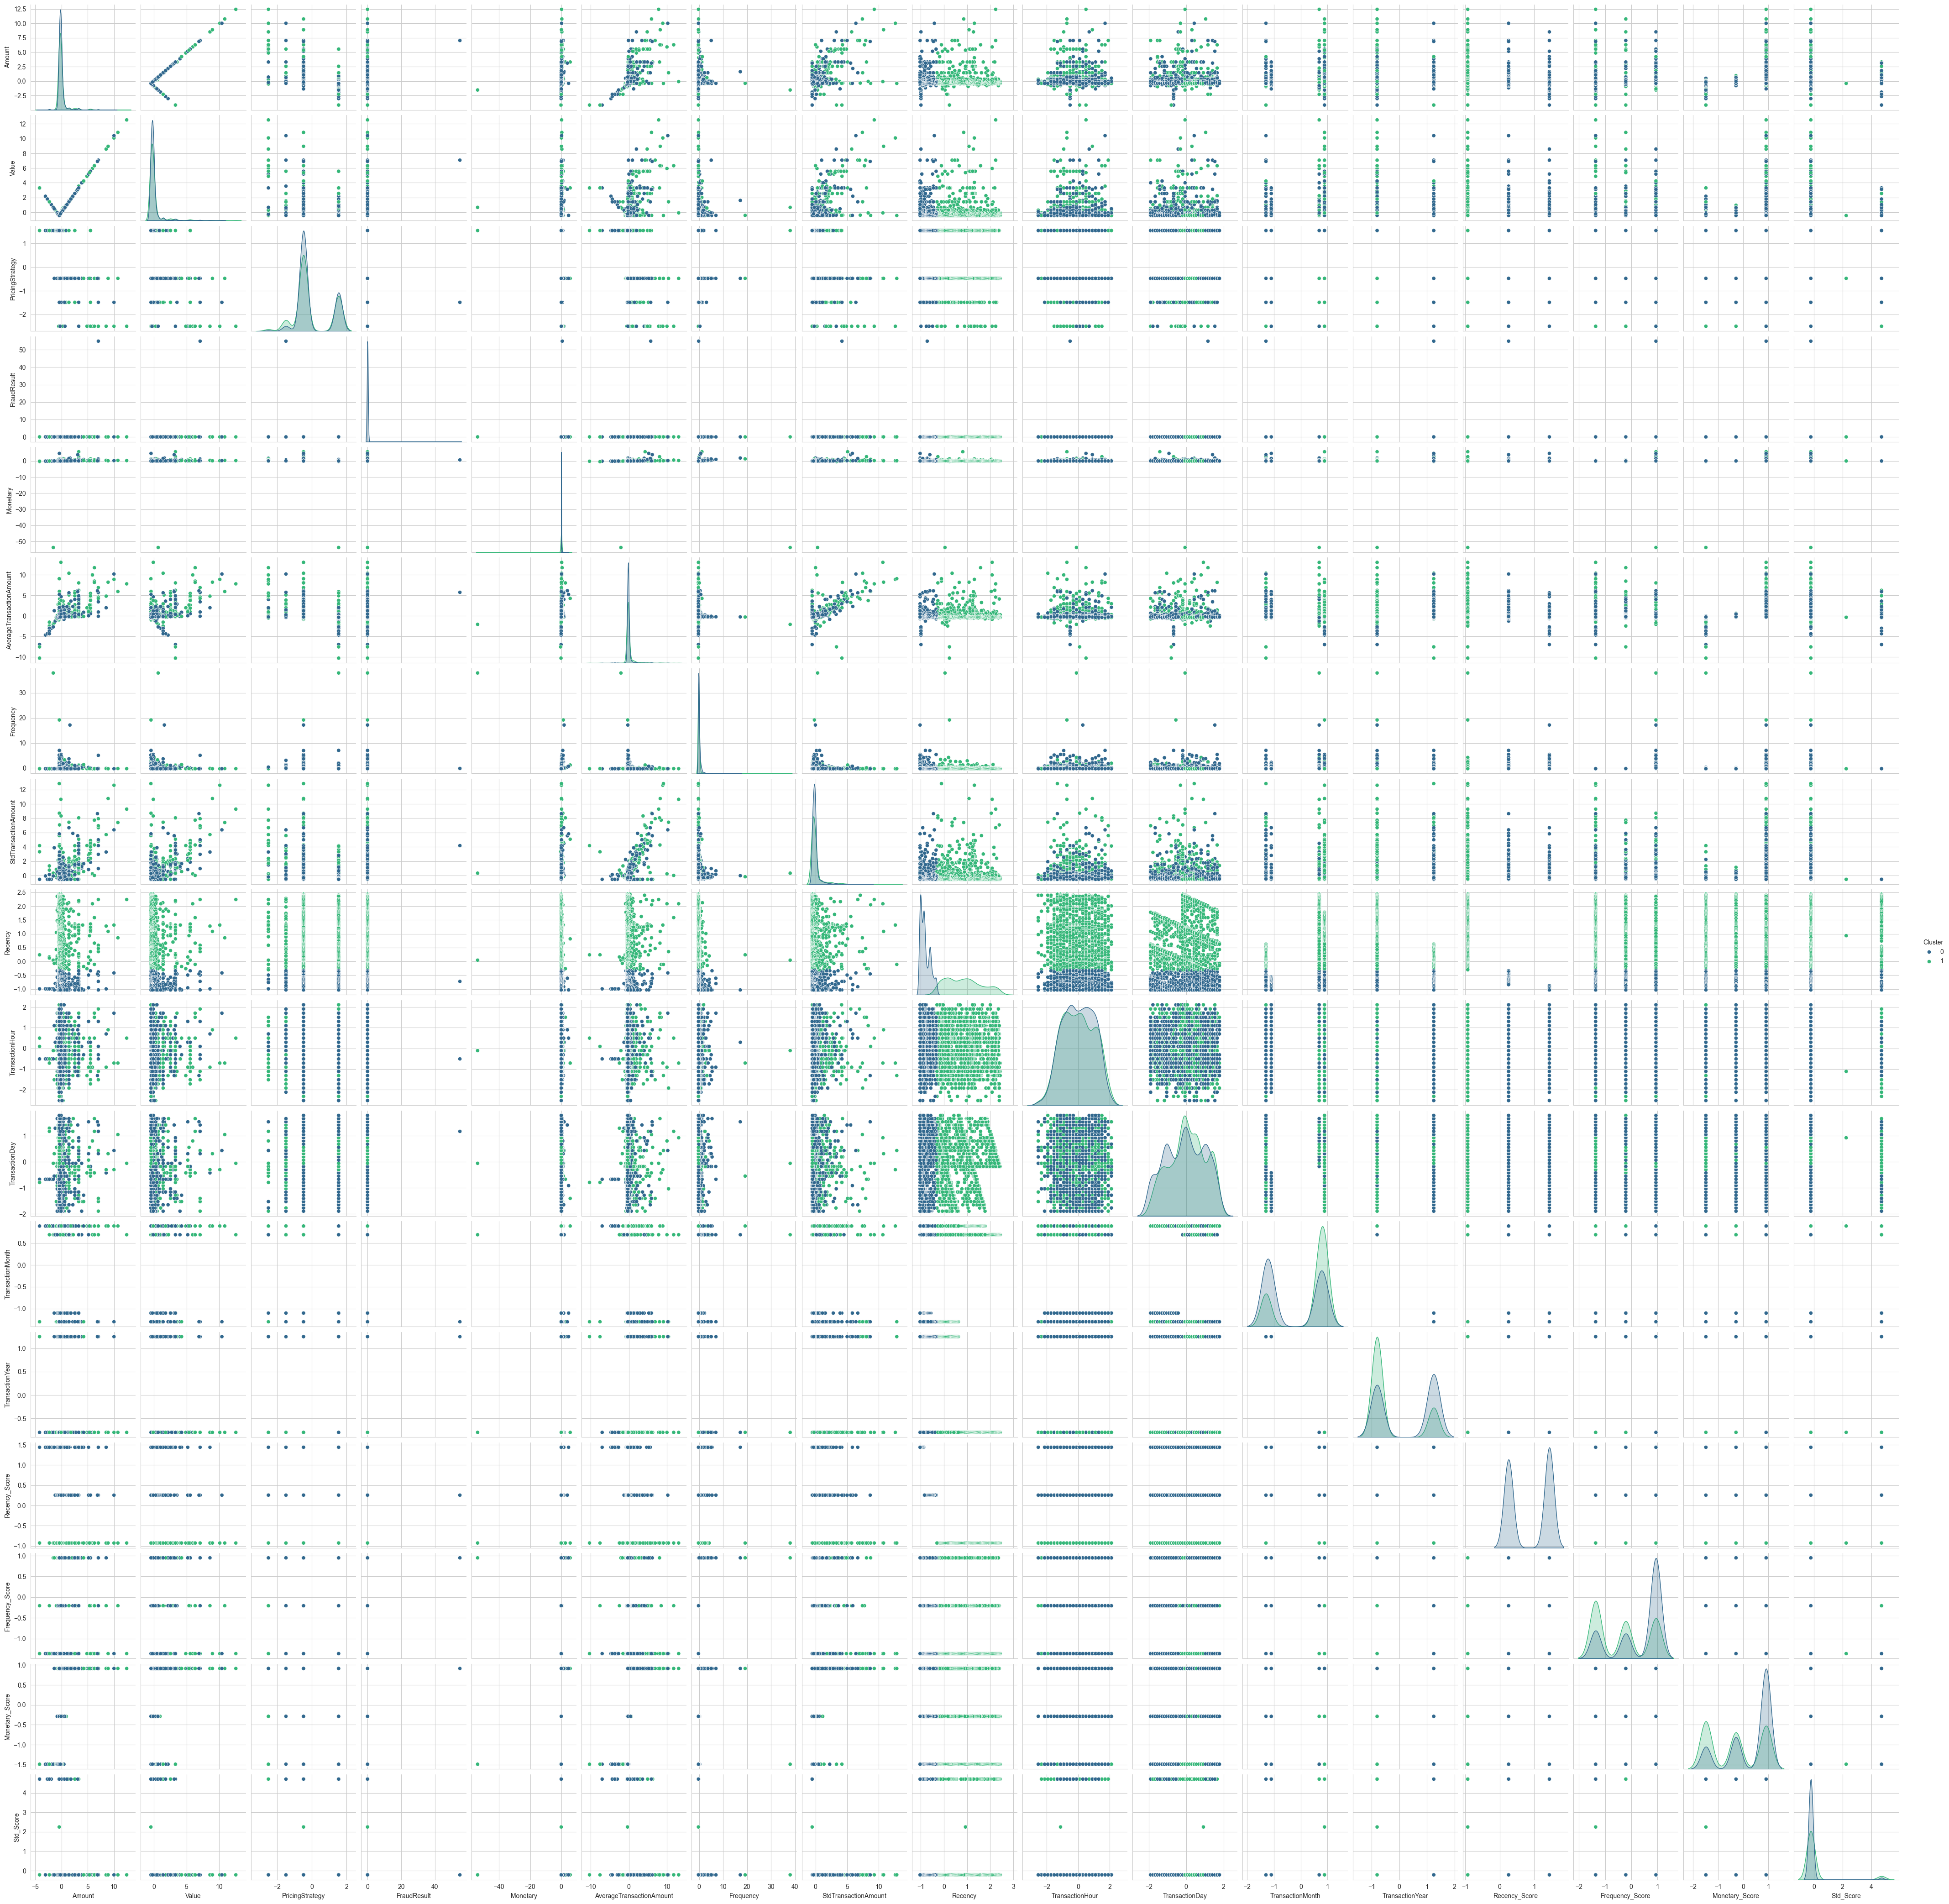

In [9]:
cluster_centers = visualize_rfms(standardized_df)

In [10]:
cluster_centers

array([[ 9.74568615e-03, -1.58933883e-02, -3.89525272e-03,
         6.29398042e-03,  1.27253195e-02,  0.00000000e+00,
         0.00000000e+00,  8.39797968e-02, -1.07886630e-02,
         1.05379844e-02,  4.87478579e-02, -4.56613173e-02,
        -4.34055825e-02,  2.18299493e-02,  1.74072324e-02,
         3.71611150e-02, -7.37570130e-02,  1.10798135e-01,
        -5.48814971e-02, -8.14619060e-01,  5.18383334e-03,
        -6.77911725e-02, -3.12506834e-01,  3.19815306e-01,
         8.86563300e-01,  3.40307199e-01,  3.15914726e-01,
        -1.20214006e-01,  2.80516321e+03],
       [-1.01877721e-02,  1.66143477e-02,  4.07195004e-03,
        -6.57948935e-03, -1.33025682e-02,  0.00000000e+00,
         0.00000000e+00, -8.77893068e-02,  1.12780607e-02,
        -1.10160108e-02, -5.09591690e-02,  4.77326161e-02,
         4.53745561e-02, -2.28202043e-02, -1.81968631e-02,
        -3.88468257e-02,  7.71027949e-02, -1.15824184e-01,
         5.73710437e-02,  8.51571989e-01, -5.41898353e-03,
         7.08

## Classifiying Customers based on Cluster Centers

##### Cluster Centers: Provides insight into the average RFMS scores for each cluster helps to define high and low risk.

In [11]:
segmented_df = apply_segment_based_on_clusters(standardized_df, cluster_centers)

In [12]:
segmented_df

TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0           1.080325 -0.017694   0.630120        1.634522    0.662786   
2          -0.301820  0.462641   0.844336       -0.799944    0.871933   
3           0.017847 -1.650098   1.455284       -0.821172    1.741494   
6          -1.249192 -1.217007  -0.617712       -0.986172   -0.518610   
8           0.398890  1.544606  -0.381402        1.237945    1.386321   
...              ...       ...        ...             ...         ...   
94889       0.538525  1.486530  -0.911659       -0.319419   -0.782399   
94915      -0.144541 -1.459783  -1.056711       -0.869418   -0.906756   
94966       0.642870  0.844973  -0.431354        0.931103   -0.352800   
94995      -0.290154  0.331199   1.417821        0.910840    1.709462   
95185      -1.100826  1.679200   1.385160        1.298734    1.677431   

       CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0               0.0          0.0    1.222552  -1.201336        -0.948113  ...   
2               0.0          0.0    1.222552  -1.399547        -0.948113  ...   
3               0.0          0.0   -1.575849   0.780770         4.107934  ...   
6               0.0          0.0    0.662872   1.771823        -0.948113  ...   
8               0.0          0.0    1.222552  -1.201336        -0.948113  ...   
...             ...          ...         ...        ...              ...  ...   
94889           0.0          0.0   -1.575849  -0.210283         0.315898  ...   
94915           0.0          0.0   -1.575849   1.771823        -0.948113  ...   
94966           0.0          0.0   -1.575849  -0.210283         0.315898  ...   
94995           0.0          0.0   -1.575849  -0.210283         0.315898  ...   
95185           0.0          0.0   -1.575849   0.186138         3.475928  ...   

       TransactionHour  TransactionDay  TransactionMonth  TransactionYear  \
0            -2.127044       -0.180975          0.688710        -0.800597   
2            -2.127044       -0.180975          0.688710        -0.800597   
3            -1.925108       -0.180975          0.688710        -0.800597   
6            -1.925108       -0.180975          0.688710        -0.800597   
8            -1.723173       -0.180975          0.688710        -0.800597   
...                ...             ...               ...              ...   
94889         1.103929       -0.549140         -1.100962         1.249067   
94915         1.305865       -0.549140         -1.100962         1.249067   
94966         1.507801       -0.549140         -1.100962         1.249067   
94995         1.709737       -0.549140         -1.100962         1.249067   
95185        -1.117365       -0.426418         -1.100962         1.249067   

       Recency_Score  Frequency_Score  Monetary_Score  Std_Score  RFM_Score  \
0           1.440917         0.948357        0.909816  -0.212693       3331   
2          -0.926780        -1.361184       -1.487528   4.711036       1113   
3           0.257069         0.948357        0.909816  -0.212693       2331   
6           0.257069         0.948357        0.909816  -0.212693       2331   
8          -0.926780        -1.361184       -1.487528  -0.212693       1111   
...              ...              ...             ...        ...        ...   
94889       1.440917        -1.361184        0.909816   4.711036       3133   
94915       1.440917        -1.361184       -1.487528   4.711036       3113   
94966       1.440917        -1.361184       -1.487528  -0.212693       3111   
94995       1.440917        -1.361184       -0.288856  -0.212693       3121   
95185       1.440917        -1.361184       -1.487528  -0.212693       3111   

         Segment  
0      High-risk  
2       Low-risk  
3      High-risk  
6      High-risk  
8       Low-risk  
...          ...  
94889  High-risk  
94915  High-risk  
94966  High-risk  
94995  High-risk  
95185  High-risk  

[3021 rows x 30 columns]

## Perform Weight of Evidence (WoE) binning 

In [13]:
binned_df, woe_iv_info = woe_binning(segmented_df)

C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are re

In [14]:
binned_df

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0                  8        4          6               9           6   
2                  4        6          7               2           7   
3                  5        0          9               2           9   
6                  1        1          3               2           3   
8                  6        9          3               8           9   
...              ...      ...        ...             ...         ...   
94889              6        9          2               4           2   
94915              4        0          1               2           2   
94966              6        7          3               7           3   
94995              4        5          9               7           9   
95185              1        9          9               8           9   

       CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  ...  \
0                 0            0           2          1                0  ...   
2                 0            0           2          0                0  ...   
3                 0            0           0          4                1  ...   
6                 0            0           2          5                0  ...   
8                 0            0           2          1                0  ...   
...             ...          ...         ...        ...              ...  ...   
94889             0            0           0          3                1  ...   
94915             0            0           0          5                0  ...   
94966             0            0           0          3                1  ...   
94995             0            0           0          3                1  ...   
95185             0            0           0          3                1  ...   

       TransactionHour  TransactionDay  TransactionMonth  TransactionYear  \
0                    0               4                 2                0   
2                    0               4                 2                0   
3                    0               4                 2                0   
6                    0               4                 2                0   
8                    0               4                 2                0   
...                ...             ...               ...              ...   
94889                8               3                 1                0   
94915                9               3                 1                0   
94966                9               3                 1                0   
94995                9               3                 1                0   
95185                1               3                 1                0   

       Recency_Score  Frequency_Score  Monetary_Score  Std_Score  RFM_Score  \
0                  1                1               1          0       3331   
2                  0                0               0          0       1113   
3                  1                1               1          0       2331   
6                  1                1               1          0       2331   
8                  0                0               0          0       1111   
...              ...              ...             ...        ...        ...   
94889              1                0               1          0       3133   
94915              1                0               0          0       3113   
94966              1                0               0          0       3111   
94995              1                0               1          0       3121   
95185              1                0               0          0       3111   

         Segment  
0      High-risk  
2       Low-risk  
3      High-risk  
6      High-risk  
8       Low-risk  
...          ...  
94889  High-risk  
94915  High-risk  
94966  High-risk  
94995  High-risk  
95185  High-risk  

[3021 rows x 30 columns]

In [15]:
woe_iv_info

{'TransactionId': 0.0035999328271010527,
 'BatchId': 0.006816622438372678,
 'AccountId': 0.032564560136563,
 'SubscriptionId': 0.013481151474480962,
 'CustomerId': 0.037775687709748214,
 'CurrencyCode': 0.0,
 'CountryCode': 0.0,
 'ProviderId': 0.06819711306726503,
 'ProductId': 0.05016473180667541,
 'ProductCategory': 0.017048604142927425,
 'ChannelId': 0.014627942595732317,
 'Amount': 0.06964605343876949,
 'Value': 0.061925270426886975,
 'PricingStrategy': 0.06860314997835924,
 'FraudResult': 0.0,
 'Monetary': 0.525293349444624,
 'AverageTransactionAmount': 0.26990796680899354,
 'Frequency': 0.7738099191725144,
 'StdTransactionAmount': 0.2533714329078921,
 'Recency': 38.82059361094523,
 'TransactionHour': 0.017291853986965918,
 'TransactionDay': 0.12260938108579585,
 'TransactionMonth': 4.872354989314034,
 'TransactionYear': 0.0,
 'Recency_Score': 46.05170186008091,
 'Frequency_Score': 0.29514426466780286,
 'Monetary_Score': 0.2895438746895706,
 'Std_Score': 0.0,
 'RFM_Score': 41.6233

## Save the the processed dataset

In [16]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(processed_data, output_folder, filename)

NameError: name 'processed_data' is not defined